## Unsupervised Analysis of Day of Week 

treating crossing each day as features to learn relationships between days 

In [1]:
from jupyter.data import get_fremont_bicycle_data

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
plt.style.use('seaborn')

from sklearn.decomposition import PCA 
from sklearn.mixture import GaussianMixture 
## clustering model 

## Get Data

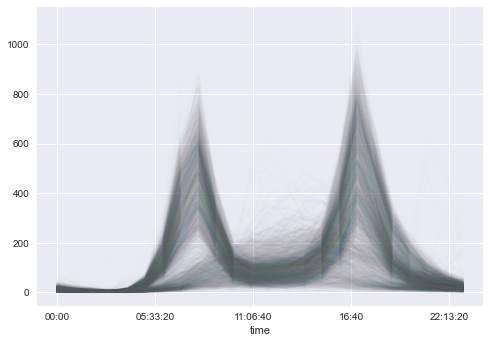

In [2]:
data = get_fremont_bicycle_data()
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.plot(alpha=0.01, legend = False)

In [3]:
type(data.index.time), data.index.time.shape, len(np.unique(data.index.time)) 

(numpy.ndarray, (134126,), 24)

In [4]:
type(pivoted.T), pivoted.T.shape

(pandas.core.frame.DataFrame, (2828, 24))

## Principle Component Analysis

In [5]:
np.sum(pivoted.isna().values)

10

In [6]:
X = pivoted.fillna(0).T.values
type(X), X.shape 

(numpy.ndarray, (2828, 24))

In [7]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
## n_components=2, svd_solver=full
## fit and transform at the same time 

In [8]:
X2.shape

(2828, 2)

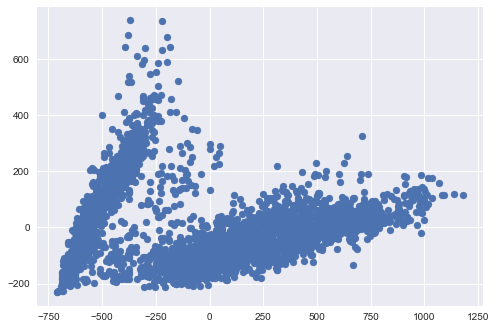

In [9]:
plt.scatter(X2[:,0], X2[:, 1])

## Unsupervised Clustering 

In [10]:
gm2 = GaussianMixture(2)
gm2.fit(X2)
labels = gm2.predict(X2)
##mm

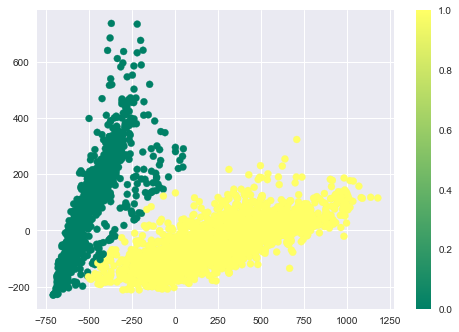

In [11]:
plt.scatter(X2[:,0], X2[:, 1], c = labels, cmap='summer')
plt.colorbar()
## show the color bar 
## cmap = 'summer'

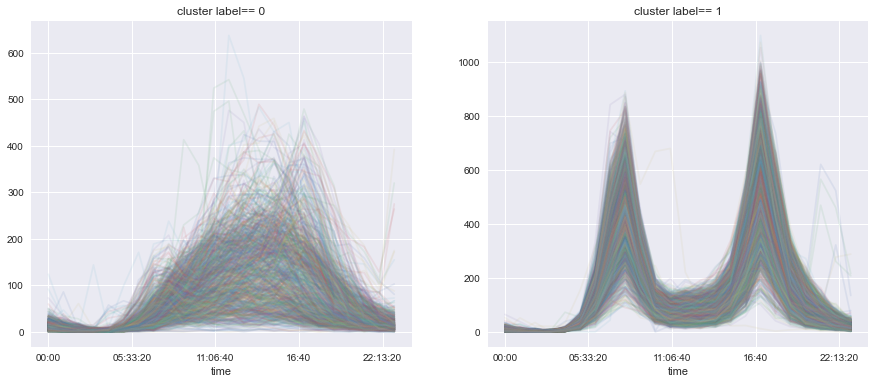

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
pivoted.T[labels==0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1, ax=ax[1])
ax[0].set_title('cluster label== 0')
ax[1].set_title('cluster label== 1')
plt.show()
##mm ax = ax[0]

## Comparing with day of week 

In [13]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

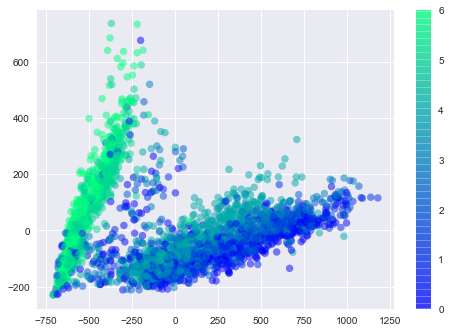

In [14]:
plt.scatter(X2[:,0], X2[:, 1], c = dayofweek, cmap='winter', alpha = 0.5)
plt.colorbar()

## Analysing Outliers 

In [15]:
pivoted.columns[(dayofweek<5) & (labels==1)]

Index([2012-10-03, 2012-10-04, 2012-10-05, 2012-10-08, 2012-10-09, 2012-10-10,
       2012-10-11, 2012-10-12, 2012-10-15, 2012-10-16,
       ...
       2020-03-05, 2020-03-06, 2020-03-09, 2020-03-10, 2020-03-11, 2020-03-12,
       2020-03-13, 2020-06-11, 2020-06-24, 2020-06-30],
      dtype='object', length=1852)

In [16]:
outliers = pd.DatetimeIndex(pivoted.columns)[(dayofweek<5) & (labels==1)]
type(outliers), outliers.shape

(pandas.core.indexes.datetimes.DatetimeIndex, (1852,))

In [17]:
outliers[:50]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16', '2012-10-17', '2012-10-18',
               '2012-10-19', '2012-10-22', '2012-10-23', '2012-10-24',
               '2012-10-25', '2012-10-26', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-05',
               '2012-11-06', '2012-11-07', '2012-11-08', '2012-11-09',
               '2012-11-12', '2012-11-13', '2012-11-14', '2012-11-15',
               '2012-11-16', '2012-11-19', '2012-11-20', '2012-11-21',
               '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29',
               '2012-11-30', '2012-12-03', '2012-12-04', '2012-12-05',
               '2012-12-06', '2012-12-07', '2012-12-10', '2012-12-11',
               '2012-12-12', '2012-12-13'],
              dtype='datetime64[ns]', freq=None)

In [18]:
pivoted.columns[(dayofweek>5) & (labels==0)]

Index([2012-10-07, 2012-10-14, 2012-10-21, 2012-10-28, 2012-11-04, 2012-11-11,
       2012-11-18, 2012-11-25, 2012-12-02, 2012-12-09,
       ...
       2020-04-26, 2020-05-03, 2020-05-10, 2020-05-17, 2020-05-24, 2020-05-31,
       2020-06-07, 2020-06-14, 2020-06-21, 2020-06-28],
      dtype='object', length=403)

In [19]:
## What's up with 2019-02-03
## Sunday
## Feb 2019 snowing 

In [20]:
pivoted.columns[0]

datetime.date(2012, 10, 3)

In [21]:
pd.to_datetime('2019-02-03').date()

datetime.date(2019, 2, 3)

In [22]:
pd.DatetimeIndex(['2019-02-03']).dayofweek

Int64Index([6], dtype='int64')

In [23]:
pivoted[pd.to_datetime('2019-02-03').date()]

00:00:00     10.0
01:00:00      5.0
02:00:00      1.0
03:00:00      0.0
04:00:00      4.0
05:00:00      5.0
06:00:00     21.0
07:00:00    509.0
08:00:00    869.0
09:00:00    547.0
10:00:00    668.0
11:00:00    679.0
12:00:00    221.0
13:00:00    108.0
14:00:00     69.0
15:00:00     23.0
16:00:00     24.0
17:00:00     12.0
18:00:00      3.0
19:00:00      8.0
20:00:00     10.0
21:00:00      4.0
22:00:00      2.0
23:00:00      3.0
Name: 2019-02-03, dtype: float64